<a href="https://colab.research.google.com/github/Saurabh-Hase/Hotel-booking-EDA/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [56]:
df=pd.read_csv("/content/drive/MyDrive/Copy of Hotel Bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [57]:
#To see all columns we have to pass "set_option"
pd.set_option('display.max_columns', None)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [58]:
df.shape

(119390, 32)

In [59]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [61]:
# Finding null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

ltes check corelation betwn variable

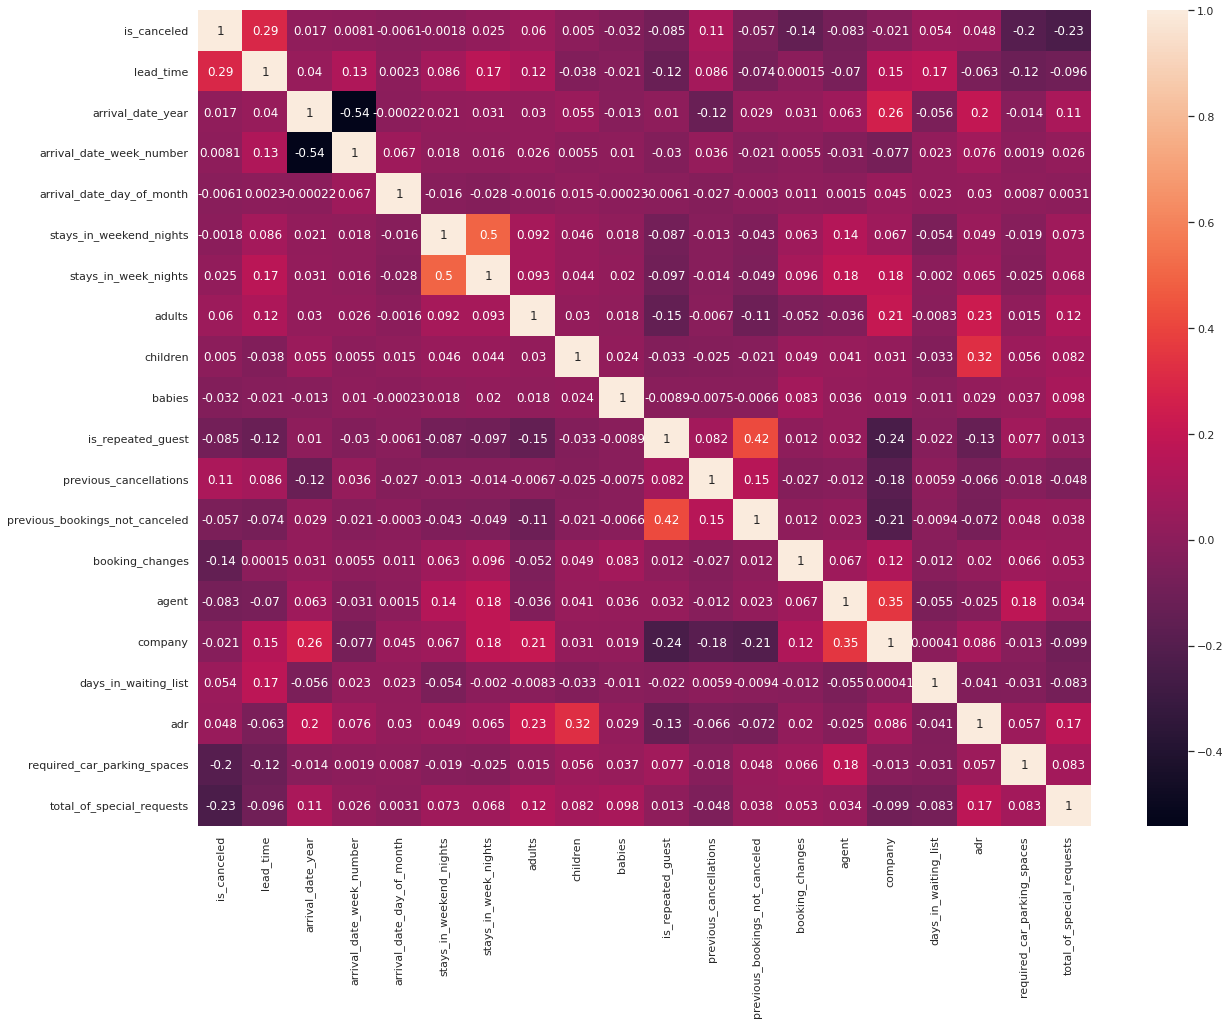

In [62]:

sns.set(rc = {'figure.figsize':(20,15)})
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

1. Removing NAN

In [63]:
# For country we have 488 null value which is vey less compare to  119390 observation so we can remove that directly same as children
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)

In [64]:
# In agent and company there are huge number of null value so rather than rmoving those colum we will replace null values with some values
df['agent']=df['agent'].fillna(value=0)
df['company']=df['company'].fillna(value=999)

In [65]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

##**Start Of EDA**

Lets see which type of hotel have more booking and which type of hotel have more cancellation

([<matplotlib.patches.Wedge at 0x7f9ea3ba6dd0>,
 [Text(-0.5509227544300964, 0.9520945954321745, 'City Hotel'),
  Text(0.5509228435716237, -0.9520945438510592, 'Resort Hotel')],
 [Text(-0.30050332059823437, 0.519324324781186, '66.7%'),
  Text(0.3005033692208856, -0.5193242966460322, '33.3%')])

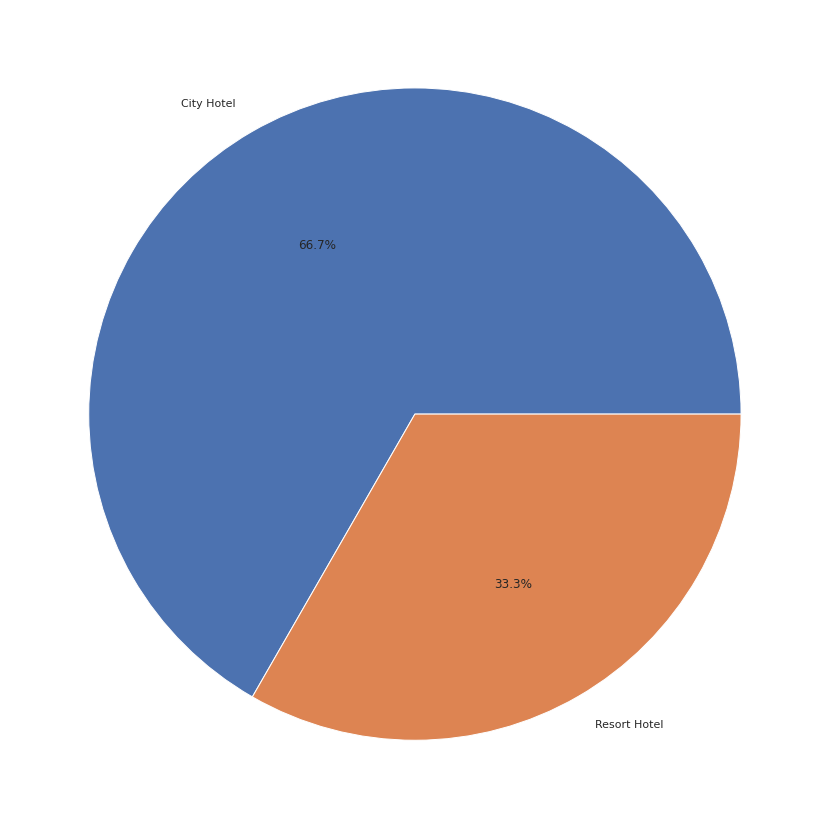

In [66]:
plt.pie(df['hotel'].value_counts(),labels=['City Hotel','Resort Hotel'],autopct='%.1f%%')

In [67]:
px.histogram (df, x = "hotel", color = 'is_canceled',width=600,height=400)

As we can see here city hotel have more booking and more cancellation as well

In [68]:
# How much reservation is cancelled from total reservation
total_reservation = df['is_canceled'].shape[0]
canceled_observation= df[df['is_canceled']==1]['is_canceled'].count()
percentage_of_calcellation= round(canceled_observation*100/total_reservation,2)
print(f'Total Canceletaion observation percentage is: {percentage_of_calcellation}%')

Total Canceletaion observation percentage is: 37.14%


As we can see huge number of hotel booking is cancelled

In [69]:
resort_hotel=df[df['hotel']=='Resort Hotel']
city_hotel=df[df['hotel']=='City Hotel']

resort_hotel_cancelled= resort_hotel[resort_hotel['is_canceled']==1]['is_canceled'].count()
city_hotel_cancelled= city_hotel[city_hotel['is_canceled']==1]['is_canceled'].count()

resort_hotel_calceled_percentage = round(resort_hotel_cancelled*100/resort_hotel['is_canceled'].count(),2)
city_hotel_calceled_percentage = round(city_hotel_cancelled*100/city_hotel['is_canceled'].count(),2)

print(f"Cancellation percentage in Resort hotel is : {resort_hotel_calceled_percentage} %")
print(f"Cancellation percentage in City hotel is : {city_hotel_calceled_percentage} %")

Cancellation percentage in Resort hotel is : 27.98 %
Cancellation percentage in City hotel is : 41.71 %


We can see here that the canceleation percentage is more in the city hotels

Now letschck the lead time when the booking done

In [70]:
px.histogram(df, x = 'lead_time', nbins=50, marginal= 'box')

As we can see most of the booking done one or two days before

In [71]:
month_wise_booking_df=df.groupby(['arrival_date_month']).hotel.count()
month_wise_booking_df

arrival_date_month
April        11045
August       13852
December      6728
February      8012
January       5874
July         12628
June         10927
March         9739
May          11779
November      6752
October      11095
September    10467
Name: hotel, dtype: int64

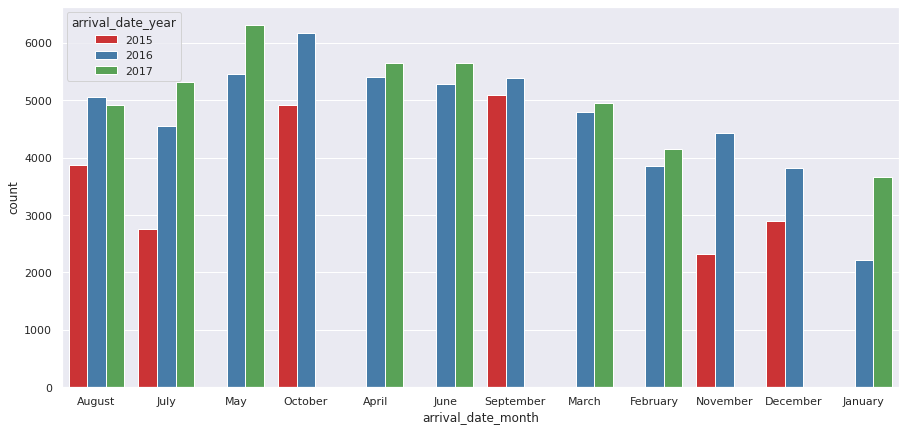

In [98]:
fig = plt.figure ( figsize = (15,7))
ax1 = fig.gca()
sns.countplot(data=df, x='arrival_date_month', ax=ax1, 
              hue='arrival_date_year', order=df['arrival_date_month'].value_counts().index,palette="Set1")

In [90]:
year_wise_booking_df=df.groupby(['arrival_date_year']).hotel.count()
year_wise_booking_df

arrival_date_year
2015    21859
2016    56435
2017    40604
Name: hotel, dtype: int64

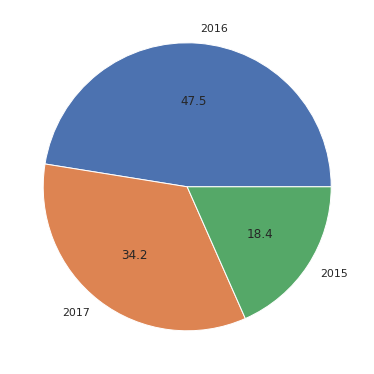

In [109]:
fig = plt.figure ( figsize = (10,5))

ax2 = fig.add_axes ([1,1,1,1])
years = dict(df['arrival_date_year'].value_counts())
ax2.pie(x=list(years.values()), labels=list(years.keys()),  autopct='%1.1f');

##Checking country wise distribution

---



In [124]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

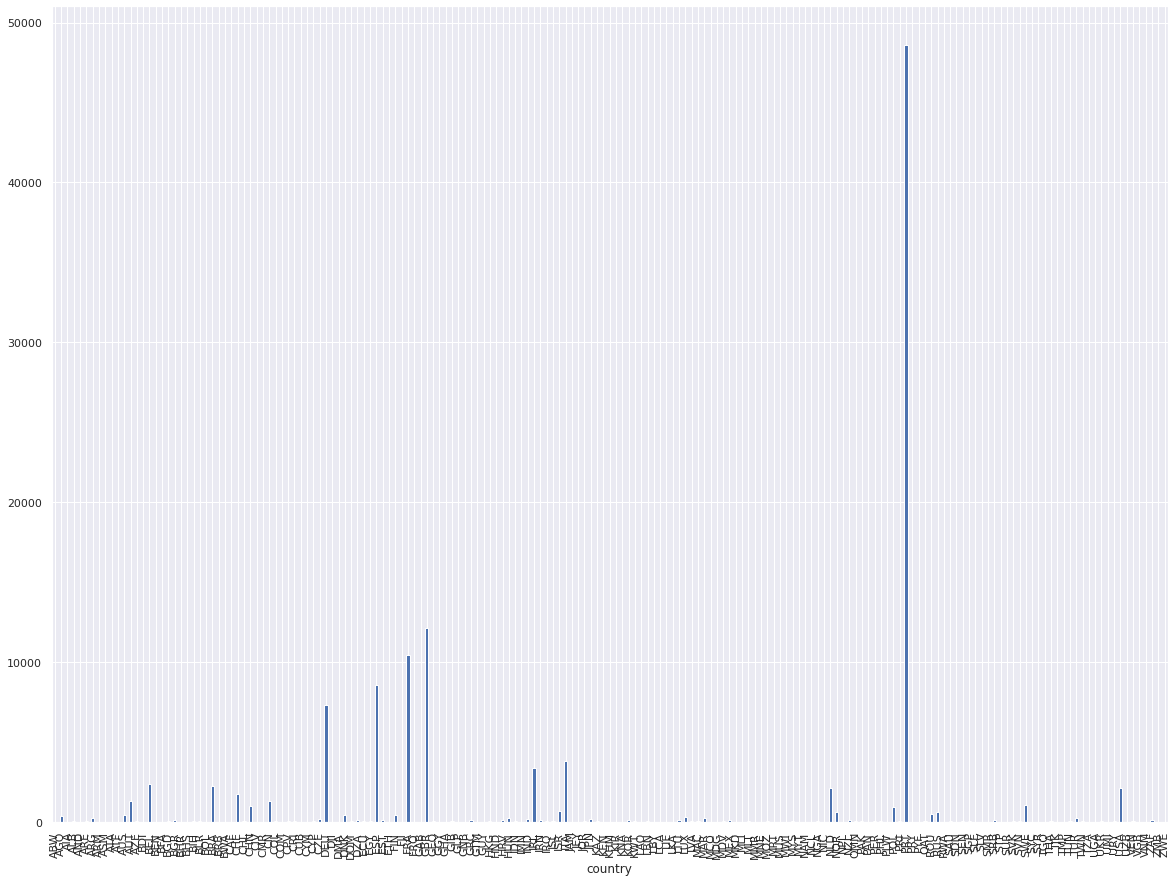

In [122]:
df.groupby(['country']).size().plot(kind = "bar")



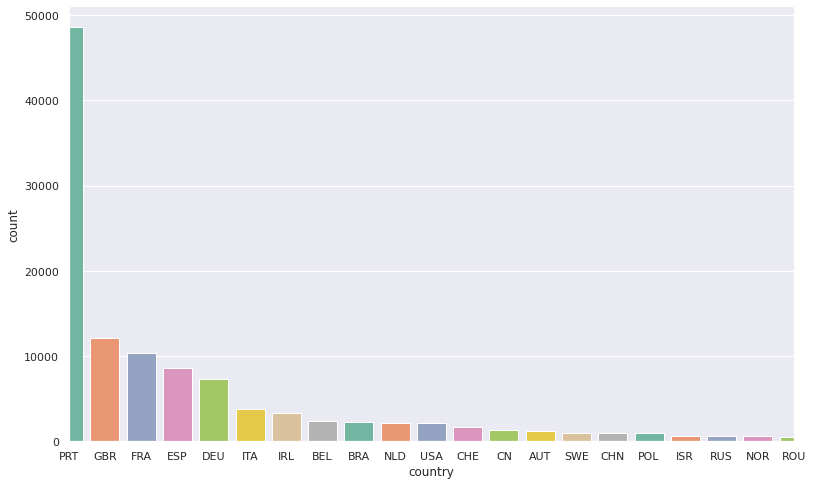

In [126]:
plt.figure(figsize=(13, 8))

sns.countplot(data=df, x='country', order=df['country'].value_counts().keys(), palette="Set2").set_xlim(0, 20)

plt.show()

In [137]:
country_counts = df['country'].value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index, 
                                  'Count' : country_counts.values})

px.choropleth(
    country_counts_df, 
    locations = 'Country',
    color = 'Count',     
    labels={'Count':'Number of Guests'}, 
    title = 'Home Country of Guests'
    )

##Checking agent wise disribution

---



---



(0.0, 20.0)

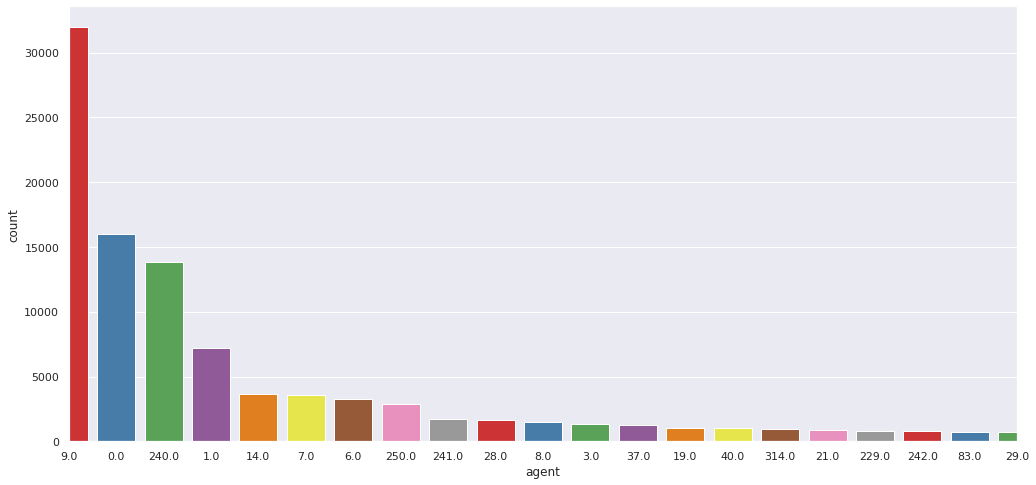

In [131]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x ='agent', order=df['agent'].value_counts().keys(),palette='Set1').set_xlim(0,20)

##CHECKING USING DISTRIBUTION CHANNEL

---



---


:

In [132]:
px.histogram(df, x = "distribution_channel", color = 'is_canceled')

##CHECKING FOR MEALS

---



---



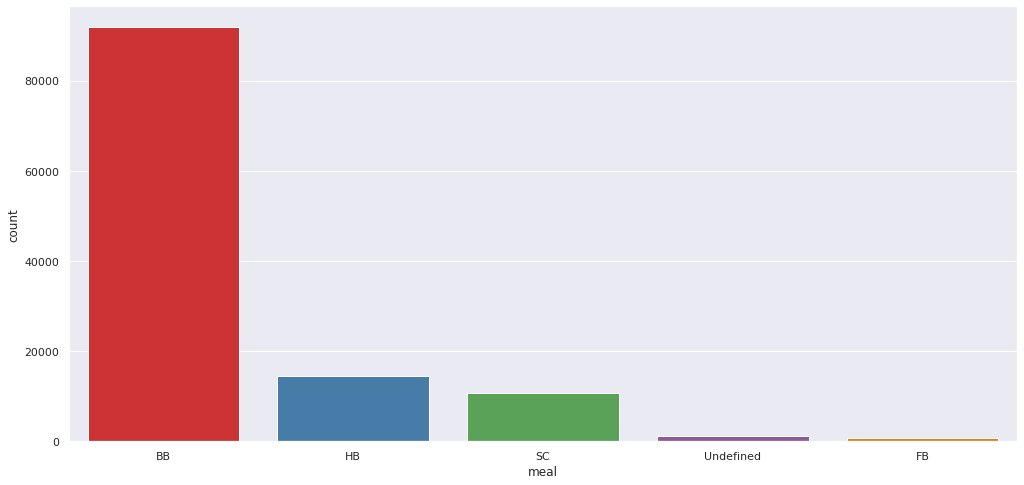

In [133]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x ='meal', order=df['meal'].value_counts().keys(),palette='Set1')

## checking weather any relation betn lead time and customer type


---



---



In [136]:
px.box(df, x = "arrival_date_year", y = "lead_time", color = "customer_type")

## customer segment booking

---



---




In [139]:
px.pie(df, values=df['customer_type'].value_counts(),names=df['customer_type'].unique())

## Repeated guest

---



---



Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

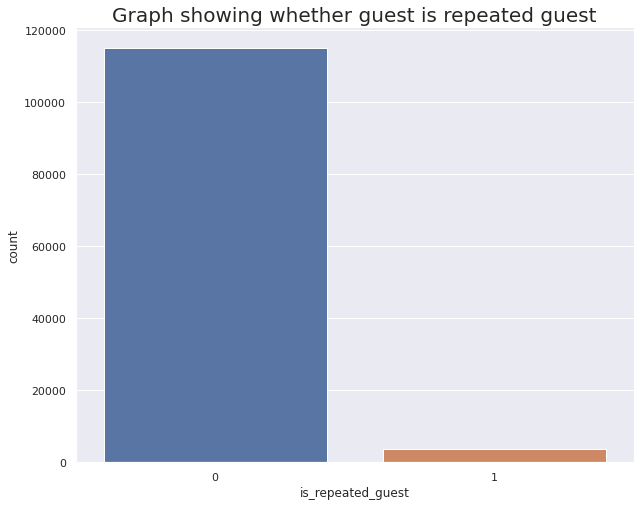

In [143]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

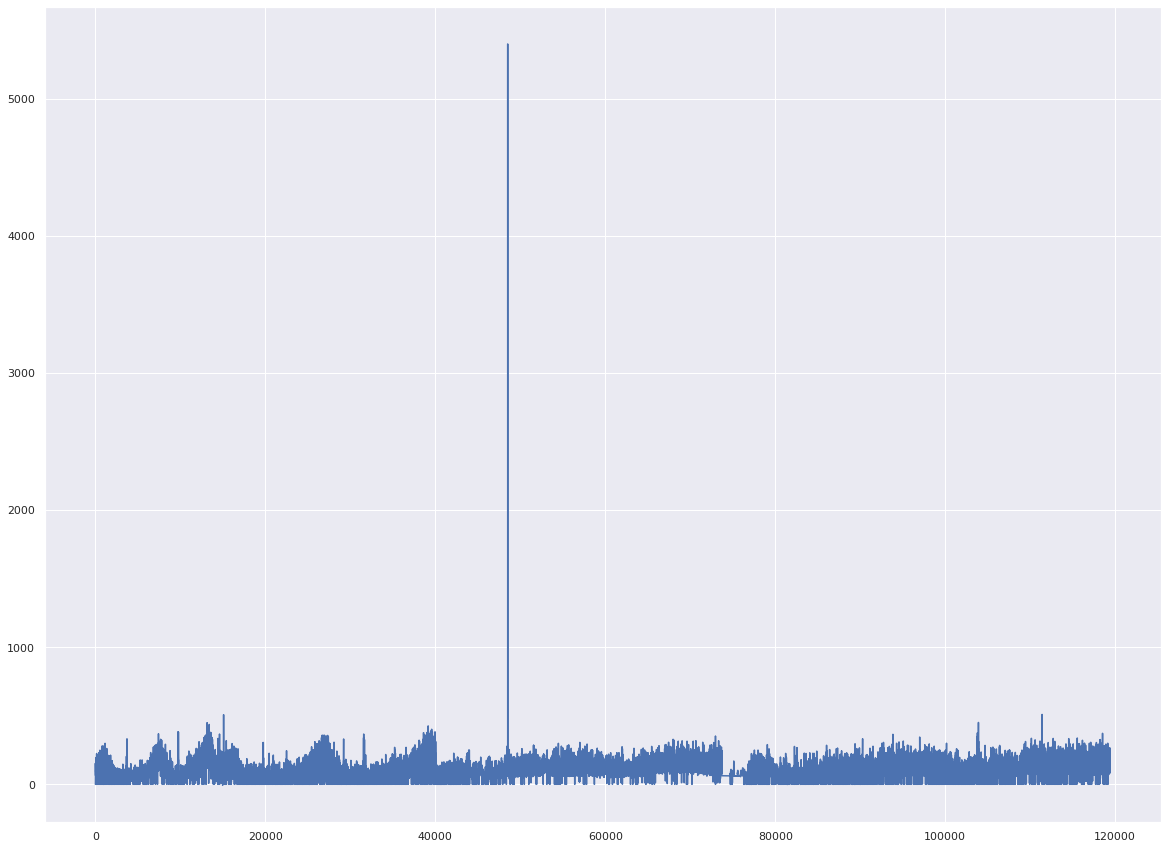

In [147]:
plt.plot(df["adr"])
plt.show()